# Lab : Image Classification using Convolutional Neural Networks

At the end of this laboratory, you would get familiarized with

*   Creating deep networks using Keras
*   Steps necessary in training a neural network
*   Prediction and performance analysis using neural networks

---

# **In case you use a colaboratory environment**
By default, Colab notebooks run on CPU.
You can switch your notebook to run with GPU.

In order to obtain access to the GPU, you need to choose the tab Runtime and then select “Change runtime type” as shown in the following figure:

![Changing runtime](https://miro.medium.com/max/747/1*euE7nGZ0uJQcgvkpgvkoQg.png)

When a pop-up window appears select GPU. Ensure “Hardware accelerator” is set to GPU.

# **Working with a new dataset: CIFAR-10**

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. More information about CIFAR-10 can be found [here](https://www.cs.toronto.edu/~kriz/cifar.html).

In Keras, the CIFAR-10 dataset is also preloaded in the form of four Numpy arrays. x_train and y_train contain the training set, while x_test and y_test contain the test data. The images are encoded as Numpy arrays and their corresponding labels ranging from 0 to 9.

Your task is to:

*   Visualize the images in CIFAR-10 dataset. Create a 10 x 10 plot showing 10 random samples from each class.
*   Convert the labels to one-hot encoded form.
*   Normalize the images.




In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 14s 0us/step


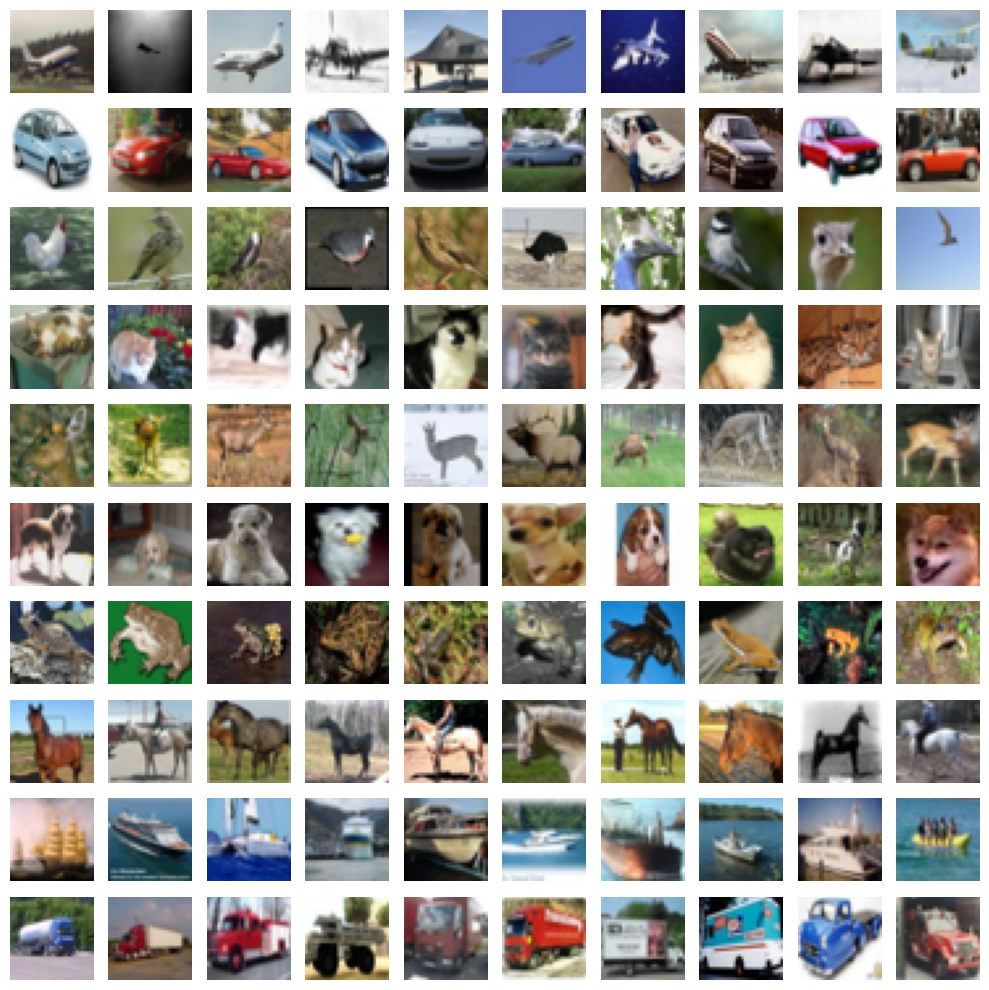

In [3]:
# Prepare a graph to display 10 random images from each class
fig, axes = plt.subplots(10, 10, figsize=(10, 10))

# Define data classes
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

for i in range(10):

    # Take 10 random images from each class
    indices = np.where(y_train == i)[0]
    random_indices = np.random.choice(indices, 10, replace=False)

    # Plot the images
    for j in range(10):
        ax = axes[i, j]
        ax.imshow(x_train[random_indices[j]])
        ax.axis('off')

plt.tight_layout()
plt.show()

# Converting Categories to One-Hot Representation
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Normalizing Data
x_train = x_train / 255.0
x_test = x_test / 255.0

## Define the following model (same as the one in tutorial)

For the convolutional front-end, start with a single convolutional layer with a small filter size (3,3) and a modest number of filters (32) followed by a max pooling layer. 

Use the input as (32,32,3). 

The filter maps can then be flattened to provide features to the classifier. 

Use a dense layer with 100 units before the classification layer (which is also a dense layer with softmax activation).

In [4]:
from keras.backend import clear_session
clear_session()

In [6]:
# Your code here :
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.backend import clear_session

# Clear previous session to avoid lingering memory
clear_session()

# Build model
model = Sequential()

# 3x3 convolutional layer with 32 filters
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))

# Max Pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Clear layers to flatten the output and convert it to a shape that can be fed into dense layers
model.add(Flatten())

# Dense layer with 100 units
model.add(Dense(100, activation='relu'))

# Classification layer with Activate softmax to classify 10 classes
model.add(Dense(10, activation='softmax'))

# Summarize the model structure
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 7200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │       720,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 722,006 (2.75 MB)

 Trainable params: 722,006 (2.75 MB)

 Non-trainable params: 0 (0.00 B)

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [7]:
# Your code here :
from tensorflow.keras.optimizers import SGD

# Compile the model using categorical_crossentropy loss function, SGD optimizer and 'accuracy' as metric
model.compile(optimizer=SGD(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model on CIFAR-10 data for 50 epochs with batch size 512
model.fit(x_train, y_train, epochs=50, batch_size=512, validation_data=(x_test, y_test))

Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 9s 75ms/step - accuracy: 0.1561 - loss: 2.2598 - val_accuracy: 0.2313 - val_loss: 2.1522
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - accuracy: 0.2582 - loss: 2.1168 - val_accuracy: 0.2764 - val_loss: 2.0388
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 6s 58ms/step - accuracy: 0.3035 - loss: 2.0007 - val_accuracy: 0.3275 - val_loss: 1.9512
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - accuracy: 0.3263 - loss: 1.9341 - val_accuracy: 0.3297 - val_loss: 1.9015
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - accuracy: 0.3335 - loss: 1.8923 - val_accuracy: 0.3450 - val_loss: 1.8831
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - accuracy: 0.3469 - loss: 1.8659 - val_accuracy: 0.3433 - val_loss: 1.8494
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - accuracy: 0.3674 - loss: 1.8199 - val_accuracy: 0.3647 - val_loss: 1.8098
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - accuracy: 0.3747 - loss: 1.8005 - val_accuracy: 0.3840 - v

*   Plot the cross entropy loss curve and the accuracy curve

Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 6s 65ms/step - accuracy: 0.5882 - loss: 1.1846 - val_accuracy: 0.5625 - val_loss: 1.2347
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - accuracy: 0.5900 - loss: 1.1853 - val_accuracy: 0.5441 - val_loss: 1.2864
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - accuracy: 0.5843 - loss: 1.2018 - val_accuracy: 0.5409 - val_loss: 1.2896
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 6s 57ms/step - accuracy: 0.5892 - loss: 1.1834 - val_accuracy: 0.5711 - val_loss: 1.2226
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 6s 58ms/step - accuracy: 0.5979 - loss: 1.1581 - val_accuracy: 0.5687 - val_loss: 1.2118
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 6s 58ms/step - accuracy: 0.5975 - loss: 1.1589 - val_accuracy: 0.5422 - val_loss: 1.3039
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 6s 56ms/step - accuracy: 0.5964 - loss: 1.1642 - val_accuracy: 0.5757 - val_loss: 1.2029
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 6s 56ms/step - accuracy: 0.5993 - loss: 1.1527 - val_accuracy: 0.5766 - v

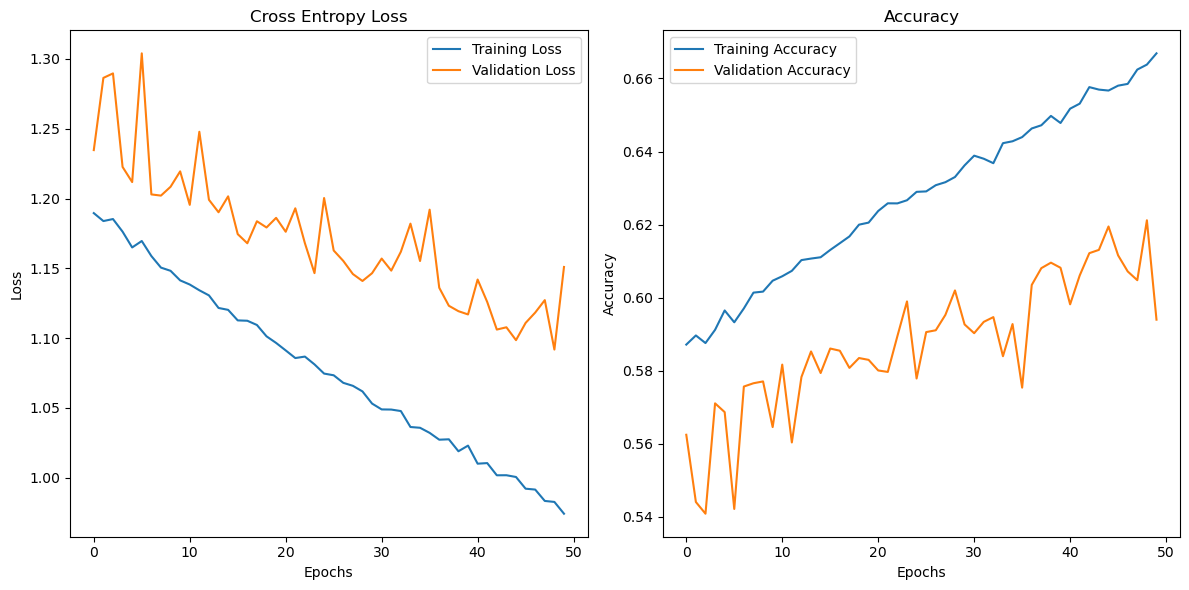

In [8]:
# Your code here :
import matplotlib.pyplot as plt

# Train the model and save the training history
history = model.fit(x_train, y_train, epochs=50, batch_size=512, validation_data=(x_test, y_test))

# Plot the Loss Curve
plt.figure(figsize=(12, 6))

# Plot the loss on the training data
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Cross Entropy Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy Curve drawing
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

## Defining Deeper Architectures: VGG Models

*   Define a deeper model architecture for CIFAR-10 dataset and train the new model for 50 epochs with a batch size of 512. We will use VGG model as the architecture.

Stack two convolutional layers with 32 filters, each of 3 x 3. 

Use a max pooling layer and next flatten the output of the previous layer and add a dense layer with 128 units before the classification layer. 

For all the layers, use ReLU activation function. 

Use same padding for the layers to ensure that the height and width of each layer output matches the input


In [9]:
from keras.backend import clear_session
clear_session()

In [ ]:
# Your code here :
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.backend import clear_session

# Clear previous session to avoid memory issues
clear_session()

# Build VGG model
model = Sequential()

# First convolutional layer with 32 3x3 filters and ReLU activation function
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))

# Second convolutional layer with 32 3x3 filters and ReLU activation function
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))

# MaxPooling pooling layer with size 2x2
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output from previous layers
model.add(Flatten())

# Dense layer with 128 units and ReLU activation function
model.add(Dense(128, activation='relu'))

# Classification layer with 10 classes and using softmax activation
model.add(Dense(10, activation='softmax'))

# Summarize the model structure
model.summary()

# Compile the model using categorical_crossentropy as loss metric and SGD as optimizer
model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [ ]:
# Your code here :
# Compile the model using categorical_crossentropy as loss metric and SGD as optimizer
model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model on CIFAR-10 data for 50 epochs with batch size 512
model.fit(x_train, y_train, epochs=50, batch_size=512, validation_data=(x_test, y_test))

*   Compare the performance of both the models by plotting the loss and accuracy curves of both the training steps. Does the deeper model perform better? Comment on the observation.
 

In [ ]:
# Your code here :
import matplotlib.pyplot as plt

# Training the simple model (defined in the previous steps)

history_simple = model.fit(x_train, y_train, epochs=50, batch_size=512, validation_data=(x_test, y_test))

# Saving the training history for the deeper model (VGG)

history_vgg = model.fit(x_train, y_train, epochs=50, batch_size=512, validation_data=(x_test, y_test))

# Plotting the loss curve (Loss Curve) for the two models
plt.figure(figsize=(12, 6))

# Loss curve for the simple model
plt.subplot(1, 2, 1)
plt.plot(history_simple.history['loss'], label='Simple Model Training Loss')
plt.plot(history_simple.history['val_loss'], label='Simple Model Validation Loss')
plt.plot(history_vgg.history['loss'], label='VGG Model Training Loss', linestyle='--')
plt.plot(history_vgg.history['val_loss'], label='VGG Model Validation Loss', linestyle='--')
plt.title('Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy curve for the two models
plt.subplot(1, 2, 2)
plt.plot(history_simple.history['accuracy'], label='Simple Model Training Accuracy')
plt.plot(history_simple.history['val_accuracy'], label='Simple Model Validation Accuracy')
plt.plot(history_vgg.history['accuracy'], label='VGG Model Training Accuracy', linestyle='--')
plt.plot(history_vgg.history['val_accuracy'], label='VGG Model Validation Accuracy', linestyle='--')
plt.title('Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

**Comment on the observation**

*The deeper model (VGG) usually performs better because it has more layers to extract complex features, but may suffer from overfitting if techniques like dropout or augmentation are not used.*

...

*   Use predict function to predict the output for the test split
*   Plot the confusion matrix for the new model and comment on the class confusions.


In [ ]:
from sklearn.metrics import confusion_matrix

# Predict classes using the model on the test set
y_pred = model.predict(x_test)

# Convert predictions to actual classes
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

**Comment here :**

*The confusion matrix shows the distribution of correct and incorrect predictions across classes. Classes that are frequently confused can be observed, indicating that the model has difficulty distinguishing between them. This can be due to similarity between classes or missing data.*

...

*    Print the test accuracy for the trained model.

In [ ]:
# Your code here :
# Evaluate the model on the test set and print the accuracy
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

## Define the complete VGG architecture.

Stack two convolutional layers with 64 filters, each of 3 x 3 followed by max pooling layer. 

Stack two more convolutional layers with 128 filters, each of 3 x 3, followed by max pooling, followed by two more convolutional layers with 256 filters, each of 3 x 3, followed by max pooling. 

Flatten the output of the previous layer and add a dense layer with 128 units before the classification layer. 

For all the layers, use ReLU activation function. 

Use same padding for the layers to ensure that the height and width of each layer output matches the input

*   Change the size of input to 64 x 64.

In [15]:
from keras.backend import clear_session
clear_session()

In [ ]:
# Your code here :
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.backend import clear_session

# Clear previous session to avoid memory issues
clear_session()

# Build a complete VGG model
model = Sequential()

# First convolutional layers with 64 filters of size 3x3
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(64, 64, 3)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second convolutional layers with 128 filters of size 3x3
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# 3rd convolutional layer with 256 filters of size 3x3
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output of the previous layers
model.add(Flatten())

# Add a dense layer with 128 units and a ReLU activation function
model.add(Dense(128, activation='relu'))

# Classification layer with 10 classes and a softmax activation function
model.add(Dense(10, activation='softmax'))

# Summarize the model structure
model.summary()

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 10 epochs with a batch size of 512.
*   Predict the output for the test split and plot the confusion matrix for the new model and comment on the class confusions.

In [ ]:
# Your code here :
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Compile the model using categorical_crossentropy as loss metric and SGD as optimizer
model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model on CIFAR-10 data for 10 epochs with batch size 512
history = model.fit(x_train, y_train, epochs=10, batch_size=512, validation_data=(x_test, y_test))

# Predict classes using the model on the test set
y_pred = model.predict(x_test)

# Convert predictions to actual classes
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate confusion matrix
cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred_classes)

# Draw confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Print test accuracy for model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Understanding deep networks

*   What is the use of activation functions in network? Why is it needed?
*   We have used softmax activation function in the exercise. There are other activation functions available too. What is the difference between sigmoid activation and softmax activation?
*   What is the difference between categorical crossentropy and binary crossentropy loss?

**Write the answers below :**

1 - Use of activation functions:

Activation functions are used to introduce non-linearity into the neural network, which helps the model learn complex patterns in data. Without them, the neural network would simply be a collection of linear operations, which cannot capture intricate relationships. Activation functions like ReLU, Sigmoid, and Softmax allow the model to learn detailed features, enhancing its modeling capabilities.

_

2 - Key Differences between sigmoid and softmax:

- Sigmoid Activation:

Primarily used for binary classification tasks (i.e., when there is only one output class, such as "yes" or "no").

Outputs a value between 0 and 1, representing the probability of belonging to the positive class.

- Softmax Activation:

Used for multi-class classification tasks (i.e., when there are more than two classes).

Outputs a set of values between 0 and 1 where the sum of all outputs is 1, representing the probabilities of belonging to each class.

_

3 - Key Differences between categorical crossentropy and binary crossentropy loss:

- Categorical Crossentropy Loss:

Used for multi-class classification tasks where each sample belongs to one of many classes.

Relies on a "one-hot" encoding of the labels. 

- Binary Crossentropy Loss: 

Used for binary classification tasks where there are only two classes (e.g., "positive" and "negative"). 

Used with predictions produced by a Sigmoid activation function.
_
